# Linear Regression Machine Learning Project for House Price Prediction

**Import Libraries**

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


**Load Dataset**

In [6]:
data_path = '/content/Housing.csv'
HouseDF = pd.read_csv(data_path)

**Display Dataset Information**

In [7]:
print("Dataset Info:")
print(HouseDF.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


**Display First Few Rows**

In [8]:
print("\nFirst few rows of the dataset:")
print(HouseDF.head())


First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


**Handle Missing Values**

In [9]:
if HouseDF.isnull().values.any():
    HouseDF.fillna(HouseDF.mean(), inplace=True)

**Covert Categorical columns to Numeric Using One-Hot Encoding**

In [10]:
non_numeric_columns = HouseDF.select_dtypes(exclude=['number']).columns
HouseDF = pd.get_dummies(HouseDF, columns=non_numeric_columns)

**Prepare Data for Training**

In [11]:
X = HouseDF.drop(columns=['price'])  # Exclude the target variable 'price'
y = HouseDF['price']

**Split Data into Training and Testing Sets**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train the Linear Regression Model**

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Save the features names**

In [14]:
feature_names = X_train.columns.tolist()
with open('feature_names.pkl', 'wb') as f:
    joblib.dump(feature_names, f)

**Make Predictions**

In [15]:
y_pred = model.predict(X_test)

**Evaluate the Model**

In [16]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1754318687330.6614


**Save the Trained Model**

In [17]:
joblib.dump(model, 'linear_regression_model.pkl')
print("Model saved.")

Model saved.


#Plotting and Visualization

**1. Correlation Heatmap**

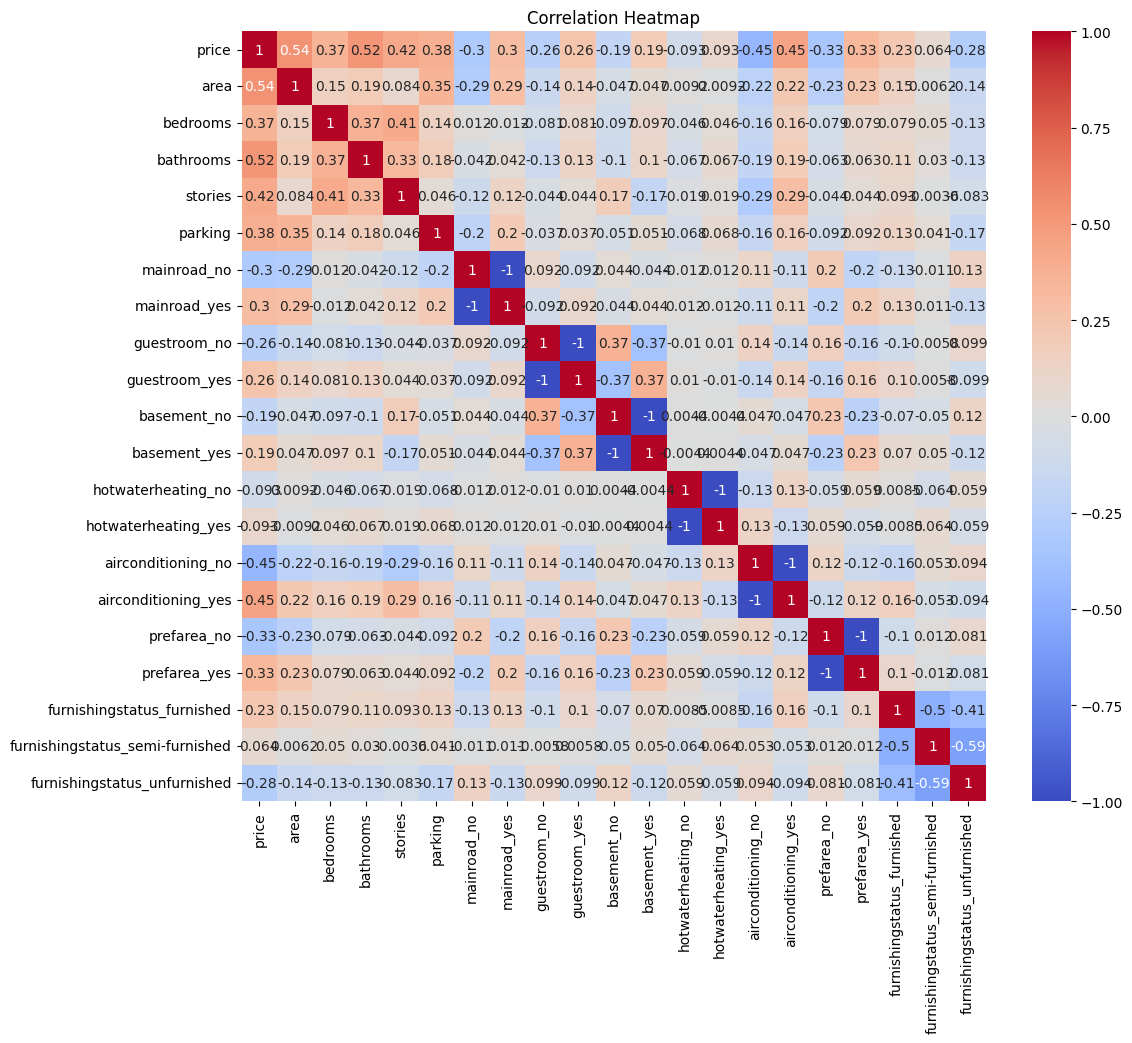

In [18]:
plt.figure(figsize=(12, 10))
correlation_matrix = HouseDF.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**2. Distribution of House Prices**

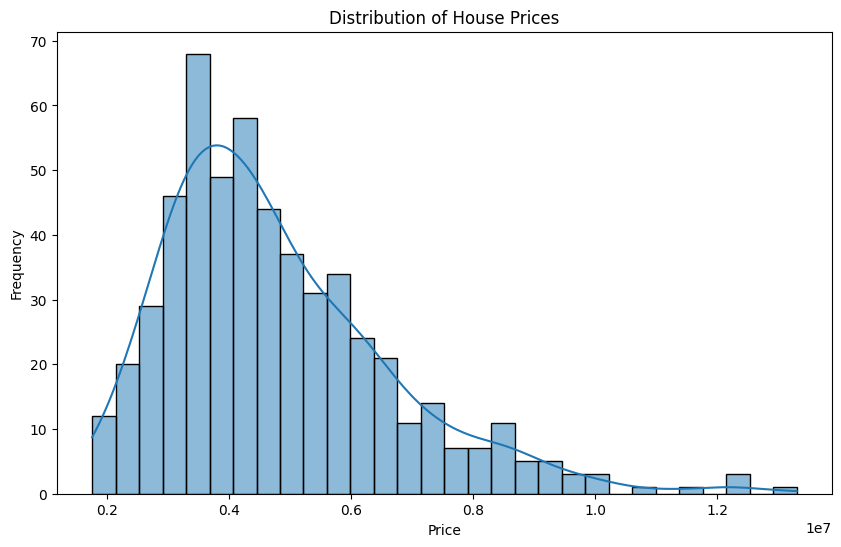

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**3. Residuals Plot**

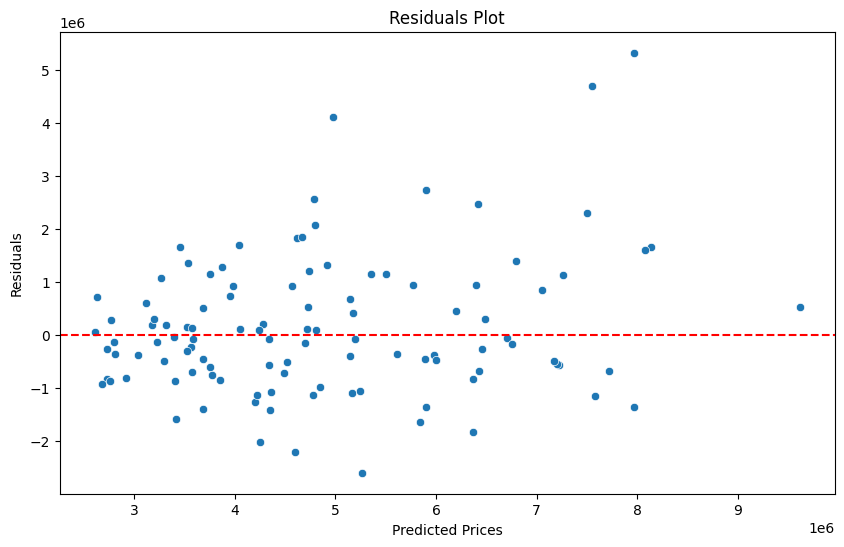

In [20]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

**4. Actual vs. predicted Prices**

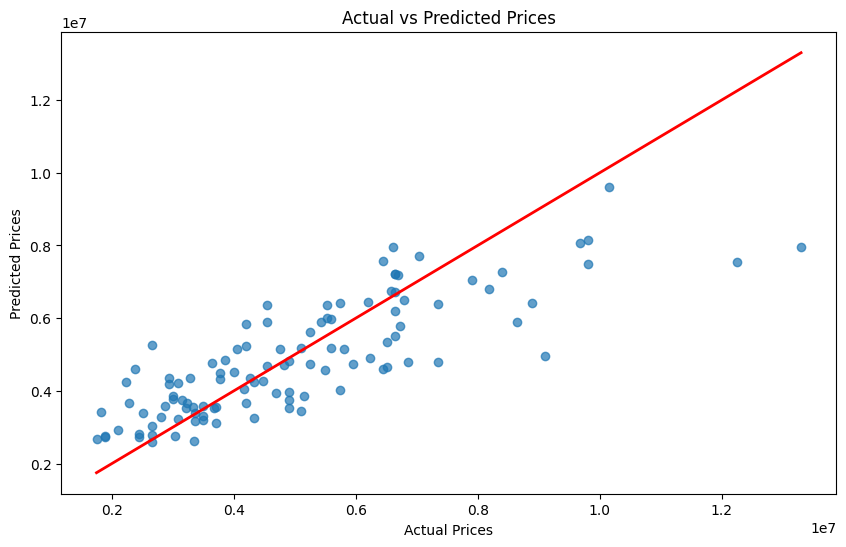

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

**5. Features Importance (Coefficients in Linear Regression)**

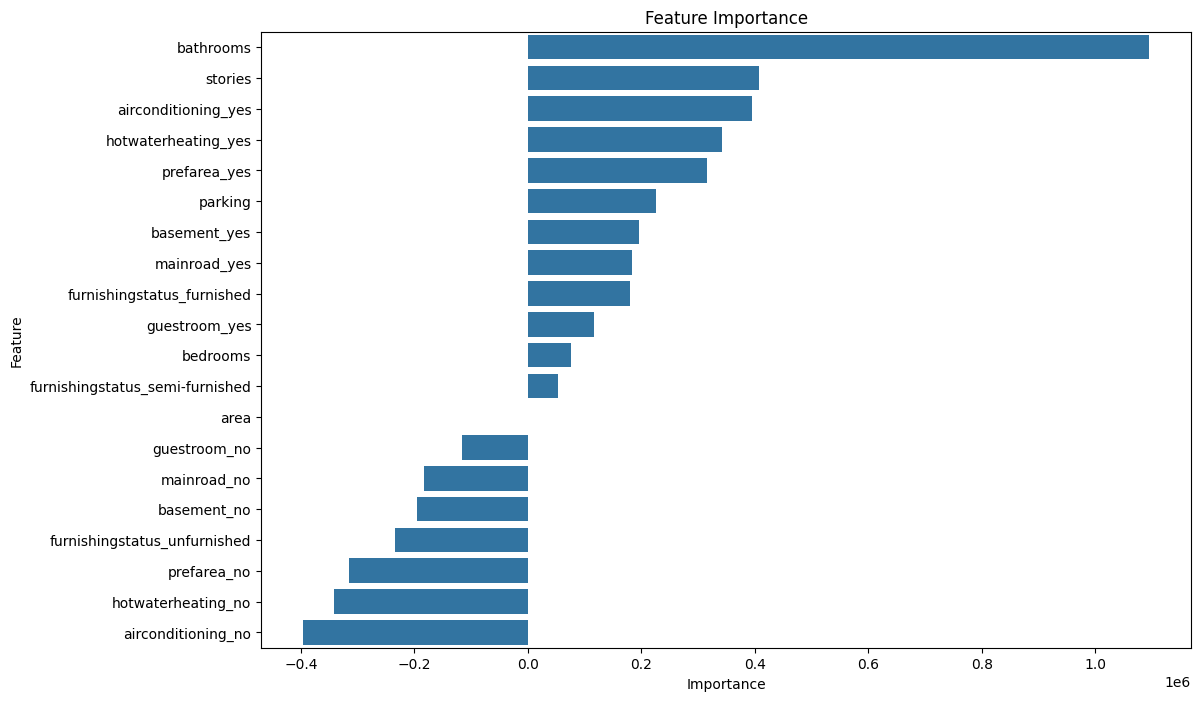

In [22]:
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
